In [50]:
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, ConcatDataset
import torchvision
from torchvision import datasets, transforms, models

In [39]:
FIG_SIZE=224
BATCH_SIZE=32

transform=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=1),
                              transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

transform_r90=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=1),
                              transforms.RandomRotation(90),
                              transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
transform_r180=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=1),
                              transforms.RandomRotation(180),
                              transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
transform_hflip=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=1),
                              transforms.RandomHorizontalFlip(1),
                              transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
transform_vflip=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=1),
                              transforms.RandomHorizontalFlip(1),
                              transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
trainpath='school_dog/train'
train_data=torchvision.datasets.ImageFolder(root=trainpath, transform=transform )
train_data1=torchvision.datasets.ImageFolder(root=trainpath, transform=transform_r90 )
train_data2=torchvision.datasets.ImageFolder(root=trainpath, transform=transform_r180 )
train_data3=torchvision.datasets.ImageFolder(root=trainpath, transform=transform_hflip )
train_data4=torchvision.datasets.ImageFolder(root=trainpath, transform=transform_vflip )
print(f'Number of training examples: {len(train_data)}')
print(type(train_data))

Number of training examples: 890
<class 'torchvision.datasets.folder.ImageFolder'>


In [51]:
FIG_SIZE=224
BATCH_SIZE=32

transform=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=3),
                              transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5,),(0.5,0.5,0.5,))])

transform_r90=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=3),
                              transforms.RandomRotation(90),
                              transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5,),(0.5,0.5,0.5,))])
transform_r180=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=3),
                              transforms.RandomRotation(180),
                              transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5,),(0.5,0.5,0.5,))])
transform_hflip=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=3),
                              transforms.RandomHorizontalFlip(1),
                              transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5,),(0.5,0.5,0.5,))])
transform_vflip=transforms.Compose([transforms.Resize([FIG_SIZE,FIG_SIZE]),transforms.Grayscale(num_output_channels=3),
                              transforms.RandomHorizontalFlip(1),
                              transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5,),(0.5,0.5,0.5,))])
trainpath='school_dog/train'
train_data=torchvision.datasets.ImageFolder(root=trainpath, transform=transform )
train_data1=torchvision.datasets.ImageFolder(root=trainpath, transform=transform_r90 )
train_data2=torchvision.datasets.ImageFolder(root=trainpath, transform=transform_r180 )
train_data3=torchvision.datasets.ImageFolder(root=trainpath, transform=transform_hflip )
train_data4=torchvision.datasets.ImageFolder(root=trainpath, transform=transform_vflip )

In [52]:
train_data=torch.utils.data.ConcatDataset([train_data,train_data1,train_data2,train_data3,train_data4])

In [53]:
train_ratio=0.9
#train_length=(int)(tlength*train_ratio)
#test_length=tlength-train_length
train_length=(int)(len(train_data)*train_ratio)
test_length=len(train_data)-train_length
train_data, test_data=torch.utils.data.random_split(train_data, [train_length, test_length])
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE,shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE,shuffle=False, num_workers=4)
classes=('dog','dog','dog','wrong')

Number of training examples: 4005
Number of testing examples: 445


In [54]:
for i, data in enumerate(test_loader):
    print(data[1])

tensor([3, 0, 2, 1, 3, 3, 3, 1, 3, 3, 3, 2, 0, 3, 3, 1, 3, 0, 2, 3, 3, 2, 3, 3,
        3, 2, 2, 1, 3, 2, 0, 3])
tensor([0, 2, 0, 2, 2, 3, 1, 2, 3, 3, 0, 3, 3, 1, 3, 2, 3, 1, 1, 2, 3, 1, 3, 2,
        0, 2, 3, 2, 2, 2, 3, 3])
tensor([3, 3, 2, 2, 3, 1, 3, 2, 1, 2, 1, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
        3, 0, 0, 1, 3, 3, 3, 2])
tensor([3, 0, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 1, 2, 3, 2, 3, 0,
        1, 3, 0, 2, 0, 2, 1, 3])
tensor([3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 2, 0, 3, 3, 2, 1,
        3, 3, 2, 2, 2, 1, 3, 3])
tensor([1, 2, 3, 3, 2, 1, 3, 3, 3, 2, 1, 3, 3, 0, 3, 3, 2, 2, 2, 2, 0, 3, 3, 3,
        2, 3, 3, 3, 3, 3, 3, 3])
tensor([3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 0, 3, 3, 1, 2, 3,
        1, 1, 0, 0, 3, 3, 3, 0])
tensor([1, 3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 0, 3, 1, 3, 0, 3, 3, 1, 0, 0, 1, 3,
        1, 0, 1, 3, 3, 1, 1, 2])
tensor([2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 0, 2, 2, 0, 3, 2, 3,
        3, 2, 3,

In [55]:
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()
                
        block, n_blocks, channels = config
        self.in_channels = channels[0]
            
        assert len(n_blocks) == len(channels) == 4
        
        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        
        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)
        
    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):
    
        layers = []
        
        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False
        
        layers.append(block(self.in_channels, channels, stride, downsample))
        
        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels
            
        return nn.Sequential(*layers)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)
        
        return x, h

In [56]:
class BasicBlock(nn.Module):
    
    expansion = 1
    
    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()
                
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, 
                               stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, 
                               stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.relu = nn.ReLU(inplace = True)
        
        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size = 1, 
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None
        
        self.downsample = downsample
        
    def forward(self, x):
        
        i = x
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        
        if self.downsample is not None:
            i = self.downsample(i)
                        
        x += i
        x = self.relu(x)
        
        return x

In [57]:
class Bottleneck(nn.Module):
    
    expansion = 4
    
    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()
    
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1, 
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, 
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)
        
        self.relu = nn.ReLU(inplace = True)
        
        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1, 
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None
            
        self.downsample = downsample
        
    def forward(self, x):
        
        i = x
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
                
        if self.downsample is not None:
            i = self.downsample(i)
            
        x += i
        x = self.relu(x)
    
        return x

In [58]:
ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])


resnet18_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet26_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet34_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [3,4,6,3],
                               channels = [64, 128, 256, 512])
resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

In [11]:
OUTPUT_DIM = len(classes)
fc = nn.Sequential(nn.Linear(1024, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, OUTPUT_DIM),
                                 nn.LogSoftmax(dim=1))

In [59]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
OUTPUT_DIM = len(classes)
model = ResNet(resnet18_config, OUTPUT_DIM)
#model.fc = nn.Sequential(nn.Linear(1024, 512),nn.ReLU(),nn.Dropout(0.2),nn.Linear(512, OUTPUT_DIM),nn.LogSoftmax(dim=1))
optimizer = optim.Adam(model.parameters(), lr=0.001)

weights = [1/55/5, 1/86/5, 1/126/5, 1/459/5] #[ 1 / number of instances for each class]
class_weights = torch.FloatTensor(weights)

criterion = nn.CrossEntropyLoss(weight=class_weights)

model = model.to(device)
criterion = criterion.to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kerne

In [60]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')
model.load_state_dict(torch.load('dog_model18_face.pt',map_location=torch.device('cpu')))

The model has 11,178,564 trainable parameters


<All keys matched successfully>

In [14]:
epochs = 70
steps = 0
running_loss = 0
print_every = 10
train_losses, test_losses ,test_acc= [], [], []

for epoch in range(epochs):
    for inputs, labels in train_loader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps, _ = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps, _ = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()
                    
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(test_loader))
            test_acc.append(accuracy/len(test_loader))
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
            running_loss = 0
            torch.save(model.state_dict(), 'dog_model18_3.pt')
            model.train()

Epoch 1/70.. Train loss: 2.270.. Test loss: 186.123.. Test accuracy: 0.463
Epoch 1/70.. Train loss: 1.322.. Test loss: 19.242.. Test accuracy: 0.148
Epoch 1/70.. Train loss: 1.411.. Test loss: 1.671.. Test accuracy: 0.254
Epoch 1/70.. Train loss: 1.222.. Test loss: 1.434.. Test accuracy: 0.179
Epoch 1/70.. Train loss: 1.181.. Test loss: 1.267.. Test accuracy: 0.291
Epoch 1/70.. Train loss: 1.230.. Test loss: 1.321.. Test accuracy: 0.292
Epoch 1/70.. Train loss: 1.110.. Test loss: 1.504.. Test accuracy: 0.272
Epoch 1/70.. Train loss: 1.095.. Test loss: 1.983.. Test accuracy: 0.175
Epoch 1/70.. Train loss: 1.059.. Test loss: 1.179.. Test accuracy: 0.261
Epoch 1/70.. Train loss: 1.134.. Test loss: 1.176.. Test accuracy: 0.294
Epoch 1/70.. Train loss: 1.119.. Test loss: 1.250.. Test accuracy: 0.448
Epoch 1/70.. Train loss: 1.088.. Test loss: 1.095.. Test accuracy: 0.377
Epoch 2/70.. Train loss: 1.004.. Test loss: 1.469.. Test accuracy: 0.294
Epoch 2/70.. Train loss: 0.969.. Test loss: 1.05

Epoch 10/70.. Train loss: 0.672.. Test loss: 0.708.. Test accuracy: 0.517
Epoch 10/70.. Train loss: 0.488.. Test loss: 0.752.. Test accuracy: 0.597
Epoch 10/70.. Train loss: 0.630.. Test loss: 0.617.. Test accuracy: 0.721
Epoch 10/70.. Train loss: 0.492.. Test loss: 0.914.. Test accuracy: 0.495
Epoch 10/70.. Train loss: 0.558.. Test loss: 0.482.. Test accuracy: 0.710
Epoch 10/70.. Train loss: 0.560.. Test loss: 0.657.. Test accuracy: 0.589
Epoch 10/70.. Train loss: 0.648.. Test loss: 0.644.. Test accuracy: 0.613
Epoch 10/70.. Train loss: 0.526.. Test loss: 0.522.. Test accuracy: 0.749
Epoch 10/70.. Train loss: 0.485.. Test loss: 0.565.. Test accuracy: 0.701
Epoch 10/70.. Train loss: 0.482.. Test loss: 0.998.. Test accuracy: 0.739
Epoch 10/70.. Train loss: 0.420.. Test loss: 0.710.. Test accuracy: 0.750
Epoch 10/70.. Train loss: 0.608.. Test loss: 0.537.. Test accuracy: 0.677
Epoch 10/70.. Train loss: 0.495.. Test loss: 0.566.. Test accuracy: 0.746
Epoch 11/70.. Train loss: 0.434.. Test

Epoch 18/70.. Train loss: 0.297.. Test loss: 0.370.. Test accuracy: 0.847
Epoch 18/70.. Train loss: 0.212.. Test loss: 0.321.. Test accuracy: 0.802
Epoch 19/70.. Train loss: 0.327.. Test loss: 0.374.. Test accuracy: 0.766
Epoch 19/70.. Train loss: 0.281.. Test loss: 0.649.. Test accuracy: 0.811
Epoch 19/70.. Train loss: 0.249.. Test loss: 0.402.. Test accuracy: 0.768
Epoch 19/70.. Train loss: 0.254.. Test loss: 0.273.. Test accuracy: 0.822
Epoch 19/70.. Train loss: 0.264.. Test loss: 0.420.. Test accuracy: 0.755
Epoch 19/70.. Train loss: 0.254.. Test loss: 0.443.. Test accuracy: 0.704
Epoch 19/70.. Train loss: 0.243.. Test loss: 0.460.. Test accuracy: 0.813
Epoch 19/70.. Train loss: 0.264.. Test loss: 0.823.. Test accuracy: 0.641
Epoch 19/70.. Train loss: 0.307.. Test loss: 0.416.. Test accuracy: 0.753
Epoch 19/70.. Train loss: 0.222.. Test loss: 0.373.. Test accuracy: 0.820
Epoch 19/70.. Train loss: 0.370.. Test loss: 0.311.. Test accuracy: 0.832
Epoch 19/70.. Train loss: 0.262.. Test

Epoch 27/70.. Train loss: 0.246.. Test loss: 0.215.. Test accuracy: 0.856
Epoch 27/70.. Train loss: 0.249.. Test loss: 0.301.. Test accuracy: 0.832
Epoch 27/70.. Train loss: 0.214.. Test loss: 1.531.. Test accuracy: 0.609
Epoch 27/70.. Train loss: 0.198.. Test loss: 0.147.. Test accuracy: 0.918
Epoch 27/70.. Train loss: 0.148.. Test loss: 0.206.. Test accuracy: 0.903
Epoch 28/70.. Train loss: 0.258.. Test loss: 0.424.. Test accuracy: 0.685
Epoch 28/70.. Train loss: 0.222.. Test loss: 0.224.. Test accuracy: 0.870
Epoch 28/70.. Train loss: 0.245.. Test loss: 0.216.. Test accuracy: 0.865
Epoch 28/70.. Train loss: 0.221.. Test loss: 0.338.. Test accuracy: 0.764
Epoch 28/70.. Train loss: 0.164.. Test loss: 0.191.. Test accuracy: 0.904
Epoch 28/70.. Train loss: 0.162.. Test loss: 0.195.. Test accuracy: 0.933
Epoch 28/70.. Train loss: 0.129.. Test loss: 0.309.. Test accuracy: 0.896
Epoch 28/70.. Train loss: 0.191.. Test loss: 0.334.. Test accuracy: 0.903
Epoch 28/70.. Train loss: 0.174.. Test

Epoch 36/70.. Train loss: 0.140.. Test loss: 0.146.. Test accuracy: 0.934
Epoch 36/70.. Train loss: 0.121.. Test loss: 0.237.. Test accuracy: 0.903
Epoch 36/70.. Train loss: 0.189.. Test loss: 0.267.. Test accuracy: 0.910
Epoch 36/70.. Train loss: 0.120.. Test loss: 0.115.. Test accuracy: 0.889
Epoch 36/70.. Train loss: 0.138.. Test loss: 0.109.. Test accuracy: 0.925
Epoch 36/70.. Train loss: 0.100.. Test loss: 0.152.. Test accuracy: 0.897
Epoch 36/70.. Train loss: 0.101.. Test loss: 0.100.. Test accuracy: 0.923
Epoch 37/70.. Train loss: 0.126.. Test loss: 0.109.. Test accuracy: 0.941
Epoch 37/70.. Train loss: 0.141.. Test loss: 0.244.. Test accuracy: 0.937
Epoch 37/70.. Train loss: 0.078.. Test loss: 0.179.. Test accuracy: 0.925
Epoch 37/70.. Train loss: 0.098.. Test loss: 0.119.. Test accuracy: 0.932
Epoch 37/70.. Train loss: 0.096.. Test loss: 0.178.. Test accuracy: 0.919
Epoch 37/70.. Train loss: 0.088.. Test loss: 0.164.. Test accuracy: 0.928
Epoch 37/70.. Train loss: 0.132.. Test

Epoch 45/70.. Train loss: 0.102.. Test loss: 0.192.. Test accuracy: 0.877
Epoch 45/70.. Train loss: 0.149.. Test loss: 0.099.. Test accuracy: 0.932
Epoch 45/70.. Train loss: 0.130.. Test loss: 0.148.. Test accuracy: 0.907
Epoch 45/70.. Train loss: 0.129.. Test loss: 0.124.. Test accuracy: 0.946
Epoch 45/70.. Train loss: 0.094.. Test loss: 0.129.. Test accuracy: 0.937
Epoch 45/70.. Train loss: 0.085.. Test loss: 0.085.. Test accuracy: 0.921
Epoch 45/70.. Train loss: 0.052.. Test loss: 0.085.. Test accuracy: 0.941
Epoch 45/70.. Train loss: 0.066.. Test loss: 0.136.. Test accuracy: 0.952
Epoch 45/70.. Train loss: 0.035.. Test loss: 0.139.. Test accuracy: 0.942
Epoch 45/70.. Train loss: 0.065.. Test loss: 0.163.. Test accuracy: 0.935
Epoch 46/70.. Train loss: 0.091.. Test loss: 0.157.. Test accuracy: 0.939
Epoch 46/70.. Train loss: 0.139.. Test loss: 0.119.. Test accuracy: 0.946
Epoch 46/70.. Train loss: 0.093.. Test loss: 0.111.. Test accuracy: 0.950
Epoch 46/70.. Train loss: 0.072.. Test

Epoch 54/70.. Train loss: 0.113.. Test loss: 0.218.. Test accuracy: 0.921
Epoch 54/70.. Train loss: 0.076.. Test loss: 0.124.. Test accuracy: 0.950
Epoch 54/70.. Train loss: 0.073.. Test loss: 0.085.. Test accuracy: 0.932
Epoch 54/70.. Train loss: 0.050.. Test loss: 0.122.. Test accuracy: 0.950
Epoch 54/70.. Train loss: 0.076.. Test loss: 0.132.. Test accuracy: 0.927
Epoch 54/70.. Train loss: 0.044.. Test loss: 0.138.. Test accuracy: 0.921
Epoch 54/70.. Train loss: 0.045.. Test loss: 0.083.. Test accuracy: 0.937
Epoch 54/70.. Train loss: 0.099.. Test loss: 0.146.. Test accuracy: 0.919
Epoch 54/70.. Train loss: 0.058.. Test loss: 0.134.. Test accuracy: 0.923
Epoch 54/70.. Train loss: 0.107.. Test loss: 0.266.. Test accuracy: 0.937
Epoch 54/70.. Train loss: 0.166.. Test loss: 0.330.. Test accuracy: 0.780
Epoch 54/70.. Train loss: 0.138.. Test loss: 0.196.. Test accuracy: 0.868
Epoch 55/70.. Train loss: 0.099.. Test loss: 0.252.. Test accuracy: 0.939
Epoch 55/70.. Train loss: 0.121.. Test

Epoch 62/70.. Train loss: 0.065.. Test loss: 0.106.. Test accuracy: 0.919
Epoch 62/70.. Train loss: 0.067.. Test loss: 0.064.. Test accuracy: 0.946
Epoch 63/70.. Train loss: 0.194.. Test loss: 0.166.. Test accuracy: 0.930
Epoch 63/70.. Train loss: 0.080.. Test loss: 0.174.. Test accuracy: 0.912
Epoch 63/70.. Train loss: 0.098.. Test loss: 0.093.. Test accuracy: 0.944
Epoch 63/70.. Train loss: 0.087.. Test loss: 0.131.. Test accuracy: 0.938
Epoch 63/70.. Train loss: 0.104.. Test loss: 0.107.. Test accuracy: 0.962
Epoch 63/70.. Train loss: 0.073.. Test loss: 0.103.. Test accuracy: 0.973
Epoch 63/70.. Train loss: 0.121.. Test loss: 0.132.. Test accuracy: 0.948
Epoch 63/70.. Train loss: 0.074.. Test loss: 0.172.. Test accuracy: 0.944
Epoch 63/70.. Train loss: 0.086.. Test loss: 0.253.. Test accuracy: 0.957
Epoch 63/70.. Train loss: 0.055.. Test loss: 0.060.. Test accuracy: 0.966
Epoch 63/70.. Train loss: 0.044.. Test loss: 0.100.. Test accuracy: 0.944
Epoch 63/70.. Train loss: 0.092.. Test

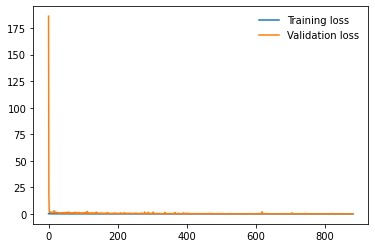

In [15]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

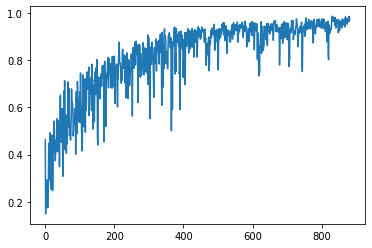

In [16]:
plt.plot(test_acc, label='Validation acc')
plt.show()

In [17]:
torch.save(model.state_dict(), 'dog_model18_face.pt')

In [18]:
test_loss = 0
accuracy = 0
model.eval()
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps, _ = model.forward(inputs)
        batch_loss = criterion(logps, labels)
        test_loss += batch_loss.item()
                    
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
print(f"Train loss: {test_loss/len(train_loader):.3f}.. "
      f"Train accuracy: {accuracy/len(train_loader):.3f}")

Train loss: 0.028.. Train accuracy: 0.992


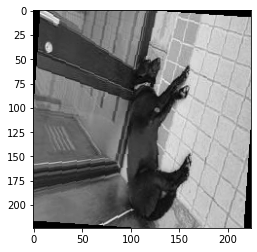

tensor(3) guess:3


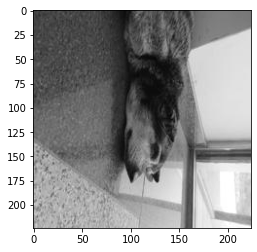

tensor(0) guess:0


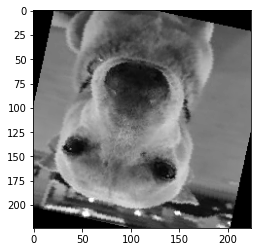

tensor(3) guess:3


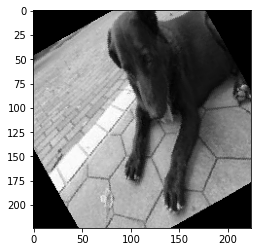

tensor(3) guess:3


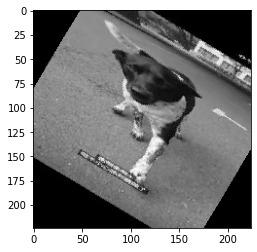

tensor(3) guess:3


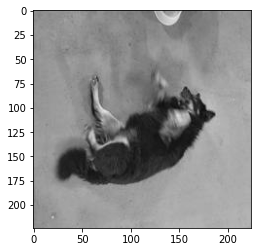

tensor(1) guess:1


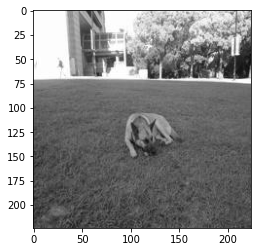

tensor(3) guess:3


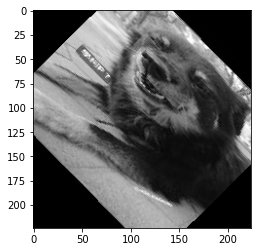

tensor(1) guess:1


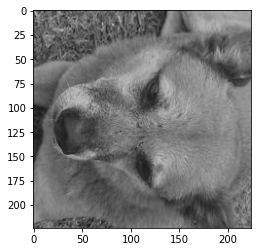

tensor(2) guess:2


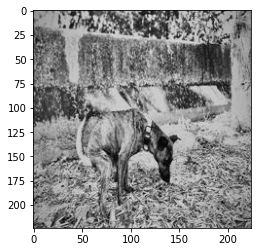

tensor(3) guess:3


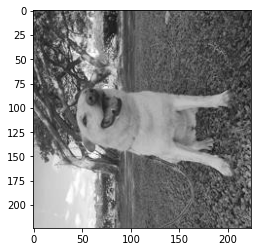

tensor(3) guess:3


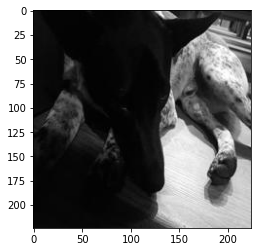

tensor(3) guess:3


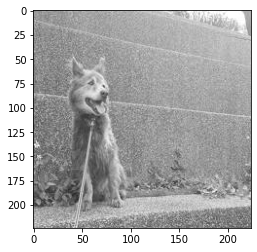

tensor(3) guess:3


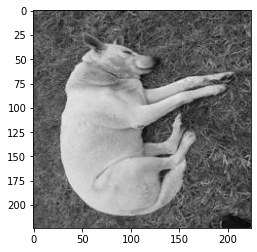

tensor(3) guess:3
Test loss: 0.060.. Test accuracy: 0.989
Test Accuracy of        dog : 100.00 % in 52
Test Accuracy of        dog : 96.77 % in 62
Test Accuracy of        dog : 96.55 % in 87
Test Accuracy of      wrong : 100.00 % in 244
test accuracy: 0.9888


In [62]:
test_loss = 0
accuracy = 0
class_correct = list(0. for i in range(4))
class_total = list(0. for i in range(4))
model.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps, _ = model.forward(inputs)
        batch_loss = criterion(logps, labels)
        test_loss += batch_loss.item()
                    
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        for i in range(len(labels)):
            class_total[(labels.view(*top_class.shape))[i]]+=1
            if top_class[i]==(labels.view(*top_class.shape))[i]:
                class_correct[(labels.view(*top_class.shape))[i]]+=1
        inputs, labels = inputs.cpu(), labels.cpu()
        plt.imshow(inputs[0][0], cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)
        plt.show()
        print(labels[0],"guess:%d"%top_class[0])
        
print(f"Test loss: {test_loss/len(test_loader):.3f}.. "
      f"Test accuracy: {accuracy/len(test_loader):.3f}")

for i in range(len(classes)):
    print('Test Accuracy of %10s : %.2f %% in %d' % (classes[i], 100 * class_correct[i] / class_total[i],class_total[i]))
print('test accuracy: %.4f' % (sum(class_correct)/sum(class_total)))

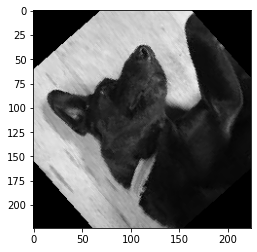

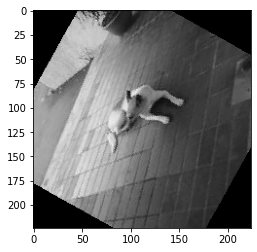

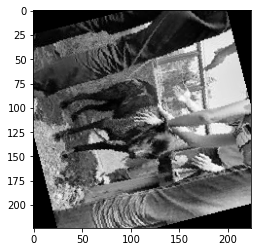

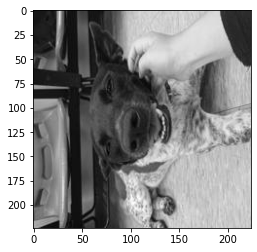

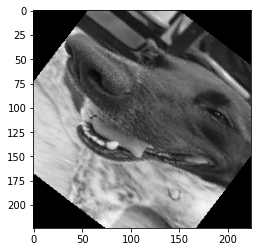

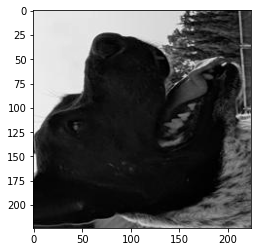

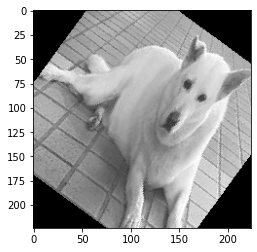

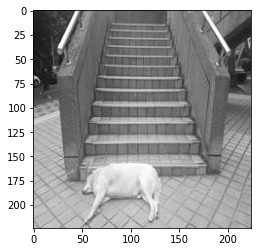

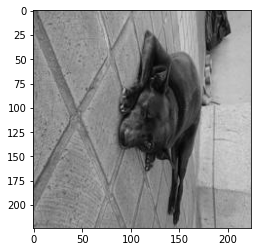

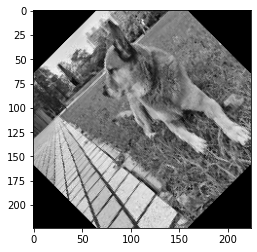

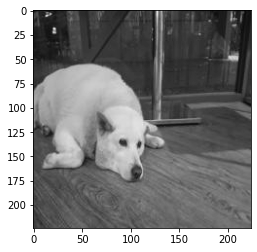

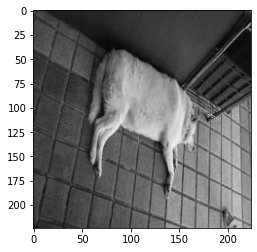

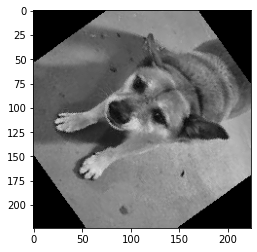

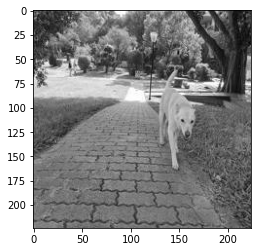

In [20]:
for inputs, labels in test_loader:
    plt.imshow(inputs[0][0], cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)
    plt.show()